# Introduction

## Background

ACLO, one of the largest student sports accosiation in Groningen, currently has more than 19,000 cardholders.

With a regular card, a cardholder can make use of group lessons, courses and open hours. A cardholder who wants to use the fitness in the Sports Centre in addition to the regular sports offer, must purchase a Fitness Card, in addition to the regular card. The percentage of cardholders who have a Fitness Card is relatively low. 

## Goal

To increase the number of fitness users and other ways to promote the Fitness Card. For example, since August 31, 2020, it is possible to use the fitness in the weekends and university holidays with only a regular ACLO card.

## Challenge

Based on the use of the Fitness, predict the number of visitors to the Fitness, taking into account the influence of 
1.    Seasons
2.    Holidays
3.    The day of the week
4.    Gender
5.    Educational institution (Hanze vs. UG)
6.    Exam periods for the UG students.

# Install Library

In [190]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Read CSV files

In [111]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import unicodedata

In [ ]:
#cardholders
cardholderPath = r".\Data\Cardholders"

#get all CSV files in the folder
cardholderCSV = glob.glob(os.path.join(cardholderPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in cardholderCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
cardholderDF = pd.concat(dfs)
cardholderDF.columns = ["Client ID", "Male", "Female", "Card Type"]

#print the content
print('Cardholders:')
display(cardholderDF.head())
print(cardholderDF.info())
print(cardholderDF.describe())


Cardholders:


,Client ID,Male,Female,Card Type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


<class 'pandas.core.frame.DataFrame'>
Index: 32830 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Client ID  32830 non-null  int64 
 1   Male       14903 non-null  object
 2   Female     17119 non-null  object
 3   Card Type  32830 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
None
           Client ID
count   32830.000000
mean   212305.477490
std     19069.354786
min     11117.000000
25%    203387.000000
50%    217945.000000
75%    225501.000000
max    235614.000000


In [ ]:
#checkin times
checkinPath = r".\Data\Check-in times"

#get all CSV files in the folder
checkinCSV = glob.glob(os.path.join(checkinPath, "*.csv"))

#create empty list
dfs = []

#loop over the list of csv files
for f in checkinCSV:

	#read the csv file
	df = pd.read_csv(f)
	#print(df.shape[0])
	dfs.append(df)

#concat all csv into one dataframe
checkinDF = pd.concat(dfs, ignore_index=True)

#print the content
print('Checkin Times:')
display(checkinDF.head())

#merge two Lid id together
print(checkinDF.info())
checkinDF.columns = ["Client ID", "Institution", "Gender", "Card Type", "Checkin Time", "Extra"]
checkinDF["Institution"] = checkinDF["Institution"].fillna(checkinDF["Extra"])
checkinDF.drop(["Extra"], axis=1, inplace=True)

#print the content
print('After Removing Duplicated Columns:')
display(checkinDF.head())
print(checkinDF.info())
print(checkinDF.describe())

Checkin Times:


,Klant nr,Lid id,Geslacht,Abo bezoek,Incheckdatum,Lid id
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,NaN
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,NaN
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,NaN
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,NaN
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Klant nr      380785 non-null  int64 
 1   Lid id        102827 non-null  object
 2   Geslacht      380785 non-null  object
 3   Abo bezoek    373011 non-null  object
 4   Incheckdatum  380785 non-null  object
 5   Lid id        253005 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.4+ MB
None
After Removing Duplicated Columns:


,Client ID,Institution,Gender,Card Type,Checkin Time
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380785 entries, 0 to 380784
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Client ID     380785 non-null  int64 
 1   Institution   355832 non-null  object
 2   Gender        380785 non-null  object
 3   Card Type     373011 non-null  object
 4   Checkin Time  380785 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.5+ MB
None
           Client ID
count  380785.000000
mean   191590.238121
std     28360.215007
min        26.000000
25%    183541.000000
50%    196651.000000
75%    207474.000000
max    235293.000000


# EDA

## Card Holders

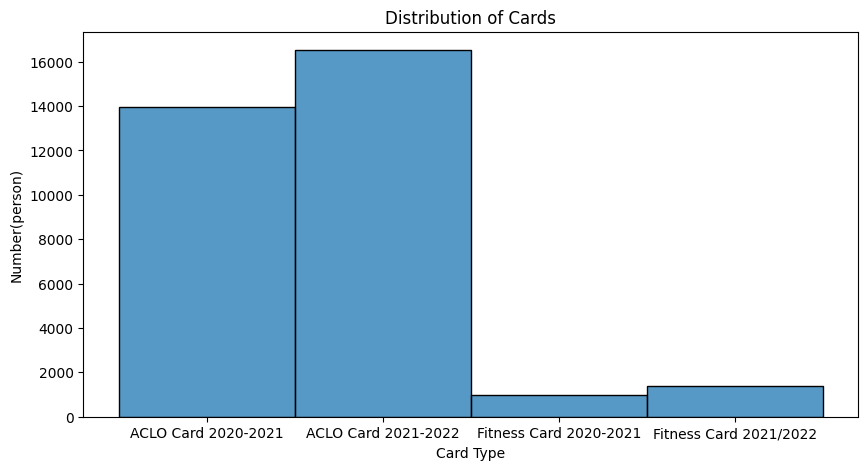

In [70]:
#type of cards
plt.figure(figsize=(10,5))
CardYear = sns.histplot(cardholderDF["Card Type"])
CardYear.set_title("Distribution of Cards")
CardYear.set_xlabel("Card Type")
CardYear.set_ylabel("Number(person)")

plt.show()

In [77]:
#gender
display(cardholderDF.head())

#combine gender column
cardholderDF["Male"] = cardholderDF["Male"].fillna(cardholderDF["Female"])
display(cardholderDF.head())

,Client ID,Male,Female,Card Type
0,206602,NaN,Vrouw,ACLO Card 2020-2021
1,220965,NaN,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


,Client ID,Male,Female,Card Type
0,206602,Vrouw,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,Vrouw,ACLO Card 2020-2021
2,221004,Man,NaN,ACLO Card 2020-2021
3,200011,Man,NaN,ACLO Card 2020-2021
4,187611,Man,NaN,ACLO Card 2020-2021


In [78]:
#remove extra column
cardholderDF.drop(["Female"], axis=1, inplace=True)
cardholderDF = cardholderDF.rename(columns={"Male": "Gender"})
display(cardholderDF.head())
print(cardholderDF["Gender"].value_counts())

,Client ID,Gender,Card Type
0,206602,Vrouw,ACLO Card 2020-2021
1,220965,Vrouw,ACLO Card 2020-2021
2,221004,Man,ACLO Card 2020-2021
3,200011,Man,ACLO Card 2020-2021
4,187611,Man,ACLO Card 2020-2021


Gender
Vrouw    17119
Man      14903
Name: count, dtype: int64


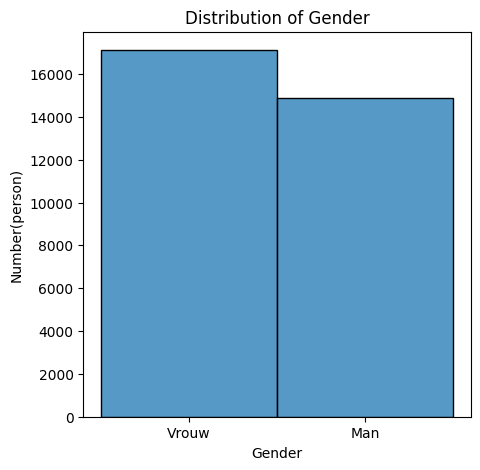

In [79]:
#Plot
plt.figure(figsize=(5,5))
Gender = sns.histplot(cardholderDF["Gender"])
Gender.set_title("Distribution of Gender")
Gender.set_xlabel("Gender")
Gender.set_ylabel("Number(person)")


plt.show()

## Check In Times

In [135]:
#check in times by education institute
print(checkinDF["Institution"].unique())

['Medewerker RUG      ' 'RUG       ' nan 'Hanze       ' 'Hanze      '
 '         ' ' ' 'GORM' 'CRUGET' '     ' 'WIWI' 'GEEJ' '       ' 'ETGE'
 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' '   ' 'WITF' '  ' '      ' 'JEVA'
 'VALE' 'UIWI' 'VWIL' 'Hanze ' '    ' 'DUJMedewerker RUG' 'KAJA'
 'RUGCHanzeHanze' 'MEAD' '        ' 'RORA' 'Medewerker RUGARN' 'JEEU'
 'Medewerker RUG/Hanze        ' 'Medewerker RUG/Hanze          '
 'Medewerker RUG/Hanze           ' 'RUG           '
 'Medewerker RUG/Hanze       ' 'RUG             ' 'Hanze            '
 'RUG          ' 'RUG            ' 'Medewerker RUG/Hanze         '
 'Hanze              ' 'Hanze        ' 'Hanze             '
 'Hanze                ' 'Hanze         ' 'Hanze               '
 'Medewerker RUG/Hanze             ' 'RUG              '
 'Hanze           ' 'Hanze          ' 'RUG                '
 'RUG               ' 'Medewerker RUG/Hanze              '
 'Medewerker RUG/Hanze            ' 'RUG                 ' 'RUG         '
 'RUG        ' 'Han

In [ ]:
#clean data
checkinDF["Institution"] = checkinDF["Institution"].str.strip()
checkinDF["Institution"].dropna(inplace = True)
print(checkinDF["Institution"].unique())

['Medewerker RUG' 'RUG' nan 'Hanze' '' 'GORM' 'CRUGET' 'WIWI' 'GEEJ'
 'ETGE' 'DROK' 'OLTI' 'Medewerker RUGORUGHanze' 'WITF' 'JEVA' 'VALE'
 'UIWI' 'VWIL' 'DUJMedewerker RUG' 'KAJA' 'RUGCHanzeHanze' 'MEAD' 'RORA'
 'Medewerker RUGARN' 'JEEU' 'Medewerker RUG/Hanze'
 'MedewerkerRUG RUG/HanzeanzeARN' 'DUJMedewerkerRUG RUG/Hanzeanze' 'BNAN'
 'KILI' 'JENRUG' 'BONI' 'HanzeOHanzeO' 'VEHanzeW' 'VRJO' 'RUGAL_dili'
 'MORN' 'A.KoRUGter@rug.nl' 'TARI' 'Medewerkers RUG/Hanze'
 '- -        :  :' '-  -        :  :' 'DUJMedewerkers RUG/Hanze'
 '-1-1 00  00:00:00' 'Medewerkers RUG/HanzeARN' 'WACHanze'
 '-1-1900  00:00:00' 'KLEB' 'AJAA' 'RUGMEL' 'KRJN'
 'Medewerkers RUG/HanzeRWB' 'waya' 'DARA' 'CAWO'
 'ROBMedewerkers RUG/Hanze' 'ROBMedewerker RUG/Hanze'
 'DUJMedewerker RUG/Hanze' 'HanzeEMC' 'MEJJ' '-  -2       :  :'
 'Medewerker RUG/Hanze ARN' 'WERUGW' 'LEFI' 'KLMO' 'NAAU'
 'Medewerker RUG/Hanze OOM' 'Medewerker RUG/Hanze ELO' 'BORUGI' 'HanzeELE'
 'KAFA']


After confirming with the instructor, Data with values like MOOM, AJAA are actually the teacher's IDs from the schools. Hence, I decided to catogorize these data as "Medewerkers RUG/Hanze"

In [137]:
#remove unnecessary and find out all workers
wrongMask = ~checkinDF["Institution"].str.contains("_|-|@", na=False)
workerMask = (~checkinDF["Institution"].isin(["RUG", "Hanze"])) & (
    (checkinDF["Institution"].str.len() == 4) | (checkinDF["Institution"].str.contains("Medewerker|Hanze|RUG"))
)

checkinDF = checkinDF[wrongMask]

workerDF = checkinDF[workerMask]

instituteCount = workerDF["Institution"].value_counts()
print(instituteCount.to_string())

Institution
Medewerker RUG/Hanze              14848
Medewerker RUG                     9552
Medewerkers RUG/Hanze              9095
WIWI                                337
VWIL                                286
BONI                                231
ETGE                                217
GEEJ                                190
UIWI                                171
WITF                                164
RORA                                140
MEAD                                133
MORN                                 81
OLTI                                 63
DUJMedewerkers RUG/Hanze             60
DUJMedewerker RUG/Hanze              59
DROK                                 54
KILI                                 52
LEFI                                 47
HanzeEMC                             44
Medewerkers RUG/HanzeARN             43
CAWO                                 42
WACHanze                             37
KRJN                                 37
DUJMedewerker RUG           

C:\Users\watas\AppData\Local\Temp\ipykernel_17616\498272078.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  workerDF = checkinDF[workerMask]


In [138]:
#make all workers into category Medewerker
checkinDF.loc[workerMask, "Institution"] = "Medewerker RUG/Hanze"
print(checkinDF["Institution"].unique())
print(checkinDF["Institution"].value_counts())

['Medewerker RUG/Hanze' 'RUG' nan 'Hanze' '']
Institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
                          6431
Name: count, dtype: int64


In [ ]:
#remove the annoying ''
checkinDF["Institution"].replace('', np.nan).dropna(inplace = True)
print(checkinDF["Institution"].value_counts())

Institution
RUG                     225749
Hanze                    84407
Medewerker RUG/Hanze     36428
Name: count, dtype: int64


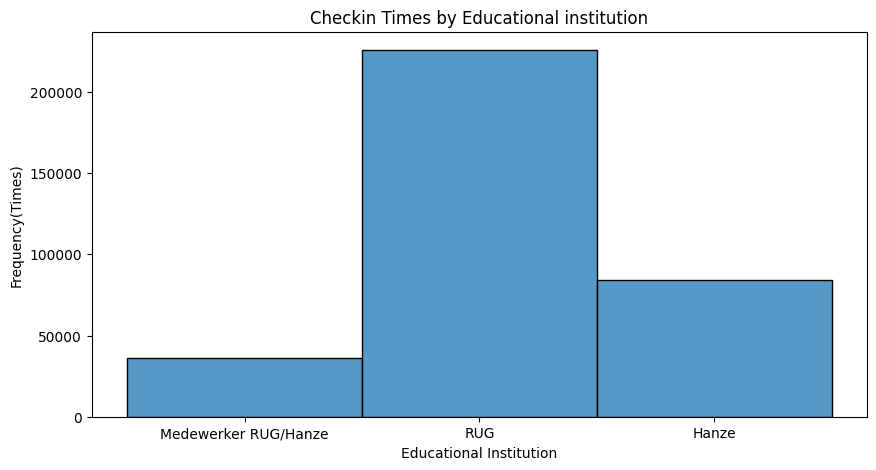

In [140]:
#Plot
plt.figure(figsize=(10,5))
Institutions = sns.histplot(checkinDF["Institution"])
Institutions.set_title("Checkin Times by Educational institution")
Institutions.set_xlabel("Educational Institution")
Institutions.set_ylabel("Frequency(Times)")

plt.show()

In [145]:
#Check in times by gender

#remove fout(error) data
print(checkinDF["Gender"].value_counts())
foutMask = checkinDF["Gender"] == "fout"
checkinDF = checkinDF.drop(index=checkinDF[foutMask].index)
print(f"After cleaning:\n{checkinDF["Gender"].value_counts()}")

Gender
M       280767
V        83381
fout     16637
Name: count, dtype: int64
After cleaning:
Gender
M    280767
V     83381
Name: count, dtype: int64


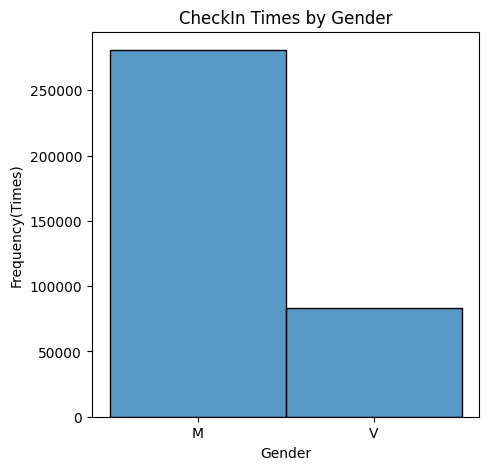

In [146]:
#plot
plt.figure(figsize=(5,5))
cGender = sns.histplot(checkinDF["Gender"])
cGender.set_title("CheckIn Times by Gender")
cGender.set_xlabel("Gender")
cGender.set_ylabel("Frequency(Times)")


plt.show()

In [147]:
#Check in times by month

print(type(checkinDF.loc[0, "Checkin Time"]))

<class 'str'>


In [148]:
#make string time into datetime
checkinDF["Checkin Time"] = pd.to_datetime(checkinDF["Checkin Time"])

#fetch out year and month
checkinDF["Year"] = checkinDF["Checkin Time"].dt.year
checkinDF["Month"] = checkinDF["Checkin Time"].dt.month_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August


In [150]:
#count frequency of month by each year
numMonth = checkinDF.groupby(['Year', 'Month']).size().reset_index(name='Frequency')
display(numMonth)

,Year,Month,Frequency
0,2017,August,4005
1,2017,December,7554
2,2017,November,10512
3,2017,October,11885
4,2017,September,8308
5,2018,April,9855
6,2018,August,2250
7,2018,December,7926
8,2018,February,11537
9,2018,January,8789


In [ ]:
#make month and year as the index and column of the table
monthPivot = numMonth.pivot(index='Month', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(monthPivot)

Year,2017,2018,2019,2020,2021
Month,,,,,
April,NaN,9855.0,10907.0,NaN,76.0
August,4005.0,2250.0,4525.0,1572.0,2590.0
December,7554.0,7926.0,12170.0,2307.0,177.0
February,NaN,11537.0,11396.0,20010.0,NaN
January,NaN,8789.0,10876.0,15936.0,NaN
July,NaN,4193.0,4839.0,1310.0,2274.0
June,NaN,9019.0,9708.0,10.0,4564.0
March,NaN,12335.0,12877.0,8452.0,NaN
May,NaN,10543.0,12899.0,NaN,1321.0


In [ ]:
#make the table more readable

#sort index by custom month order
monthSort = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthPivot = monthPivot.reindex(monthSort)

display(monthPivot)

Year,2017,2018,2019,2020,2021
Month,,,,,
January,0,8789,10876,15936,0
February,0,11537,11396,20010,0
March,0,12335,12877,8452,0
April,0,9855,10907,0,76
May,0,10543,12899,0,1321
June,0,9019,9708,10,4564
July,0,4193,4839,1310,2274
August,4005,2250,4525,1572,2590
September,8308,3933,10775,4684,5703


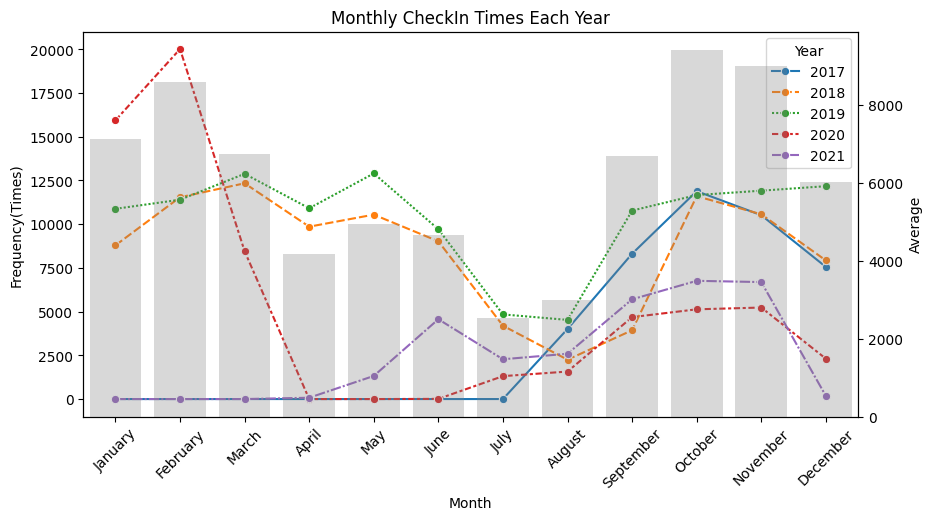

In [ ]:
#seperate monthly checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
CheckinMonth = sns.lineplot(data=monthPivot.drop(columns=['All']), marker="o", ax=ax1)
CheckinMonth.set_title("Monthly CheckIn Times Each Year")
CheckinMonth.set_xlabel("Month")
CheckinMonth.set_ylabel("Frequency(Times)")
CheckinMonth.set_xticks(range(len(monthSort))) # Ensure proper spacing for x-axis labels
CheckinMonth.set_xticklabels(monthSort, rotation=45) #increase readability
CheckinMonth.legend(title="Year")

#Barchart for average chackin
ax2 = ax1.twinx()
sns.barplot(x=monthPivot.index, y=monthPivot['All'], alpha=0.3, color='gray', ax=ax2)

plt.show()

In [156]:
#Check in times by weekdays

#Fetch weekdays
checkinDF["Weekday"] = checkinDF["Checkin Time"].dt.day_name()

display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday


In [157]:
#Count frequency of month by each year
numWeekDay = checkinDF.groupby(['Month', 'Weekday']).size().reset_index(name='Frequency')
display(numWeekDay)

,Month,Weekday,Frequency
0,April,Friday,2328
1,April,Monday,4903
2,April,Saturday,1457
3,April,Sunday,1586
4,April,Thursday,3017
...,...,...,...
79,September,Saturday,2787
80,September,Sunday,2522
81,September,Thursday,5311
82,September,Tuesday,5880


In [ ]:
#Make weekday and month as the index and column of the table
weekdayPivot = numWeekDay.pivot(index='Weekday', columns='Month', values='Frequency', fill_value = 0, margins = True)
display(weekdayPivot)

Month,April,August,December,February,January,July,June,March,May,November,October,September
Weekday,,,,,,,,,,,,
Friday,2328,2639,4468,5857,5406,2025,3466,4463,3574,6427,6250,4895
Monday,4903,3314,5653,8159,6359,2897,3853,6836,4251,8265,9104,6330
Saturday,1457,506,2332,3543,3064,502,2485,2714,1592,3818,4058,2787
Sunday,1586,345,2690,2971,2982,436,2140,2518,1363,3767,3858,2522
Thursday,3017,2721,4609,6464,5509,2106,3438,5496,4038,7023,7011,5311
Tuesday,4098,2846,5264,7956,5860,2319,4021,5761,4557,7762,8554,5880
Wednesday,3449,2571,5118,7993,6421,2331,3898,5876,5388,7846,8200,5678


In [ ]:
#increase readability

#sort index and column by order
weekdaySort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayPivot = weekdayPivot.reindex(index=weekdaySort, columns=monthSort)

display(weekdayPivot)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Weekday,,,,,,,,,,,,
Monday,6359,8159,6836,4903,4251,3853,2897,3314,6330,9104,8265,5653
Tuesday,5860,7956,5761,4098,4557,4021,2319,2846,5880,8554,7762,5264
Wednesday,6421,7993,5876,3449,5388,3898,2331,2571,5678,8200,7846,5118
Thursday,5509,6464,5496,3017,4038,3438,2106,2721,5311,7011,7023,4609
Friday,5406,5857,4463,2328,3574,3466,2025,2639,4895,6250,6427,4468
Saturday,3064,3543,2714,1457,1592,2485,502,506,2787,4058,3818,2332
Sunday,2982,2971,2518,1586,1363,2140,436,345,2522,3858,3767,2690


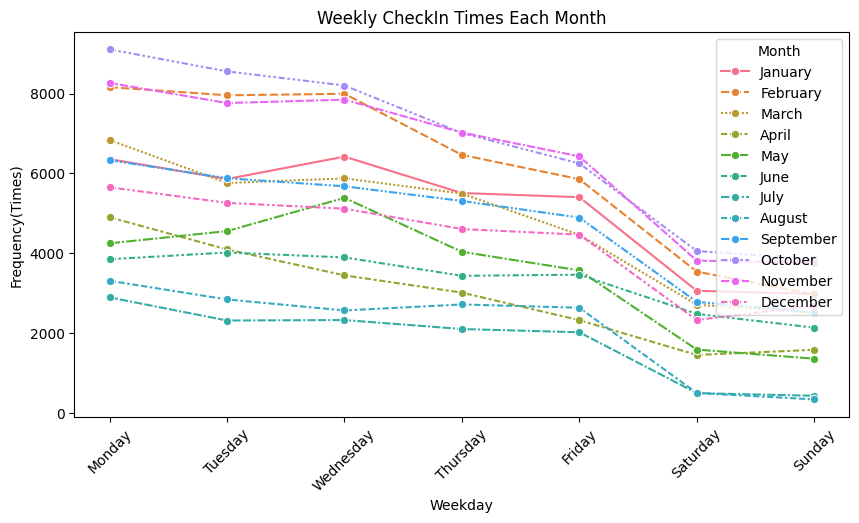

In [160]:
#Plot
plt.figure(figsize=(10,5))
checkinMonth = sns.lineplot(data=weekdayPivot, marker="o")
checkinMonth.set_title("Weekly CheckIn Times Each Month")
checkinMonth.set_xlabel("Weekday")
checkinMonth.set_ylabel("Frequency(Times)")
plt.legend(title="Month")
plt.xticks(rotation=45) #increase readability


plt.show()

In [161]:
#Check in times by season
def getSeason(month):
    if month in ("December", "January", "February"):
        return "Winter"
    elif month in ("March", "April", "May"):
        return "Spring"
    elif month in ("June", "July", "August"):
        return "Summer"
    else:
        return "Fall"

In [162]:
checkinDF["Season"] = checkinDF["Month"].apply(getSeason)
display(checkinDF.head())

,Client ID,Institution,Gender,Card Type,Checkin Time,Year,Month,Weekday,Season
0,168236,Medewerker RUG,M,Fitness Card 2016-2017,2017-08-01 12:49:10,2017,August,Tuesday,Summer
1,132339,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:11,2017,August,Tuesday,Summer
2,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:53:34,2017,August,Tuesday,Summer
3,141170,RUG,M,Fitness Card 2016-2017,2017-08-01 12:54:13,2017,August,Tuesday,Summer
4,186817,RUG,M,Fitness Card 2016-2017,2017-08-01 13:00:58,2017,August,Tuesday,Summer


In [163]:
#group season by year
numSeason = checkinDF.groupby(['Year', 'Season']).size().reset_index(name='Frequency')
display(numSeason)

,Year,Season,Frequency
0,2017,Fall,30705
1,2017,Summer,4005
2,2017,Winter,7554
3,2018,Fall,26094
4,2018,Spring,32733
5,2018,Summer,15462
6,2018,Winter,28252
7,2019,Fall,34351
8,2019,Spring,36683
9,2019,Summer,19072


In [ ]:
#make season and year as the index and column of the table
seasonPivot = numSeason.pivot(index='Season', columns='Year', values='Frequency', fill_value = 0, margins = True)
display(seasonPivot)

Year,2017,2018,2019,2020,2021
Season,,,,,
Fall,30705.0,26094.0,34351.0,15046.0,19150.0
Spring,NaN,32733.0,36683.0,8452.0,1397.0
Summer,4005.0,15462.0,19072.0,2892.0,9428.0
Winter,7554.0,28252.0,34442.0,38253.0,177.0


In [ ]:
#increase readability

#sort index and column by order
seasonSort = ['Spring', 'Summer', 'Fall', 'Winter']
seasonPivot = seasonPivot.reindex(index=seasonSort)

display(seasonPivot)

Year,2017,2018,2019,2020,2021
Season,,,,,
Spring,0,32733,36683,8452,1397
Summer,4005,15462,19072,2892,9428
Fall,30705,26094,34351,15046,19150
Winter,7554,28252,34442,38253,177


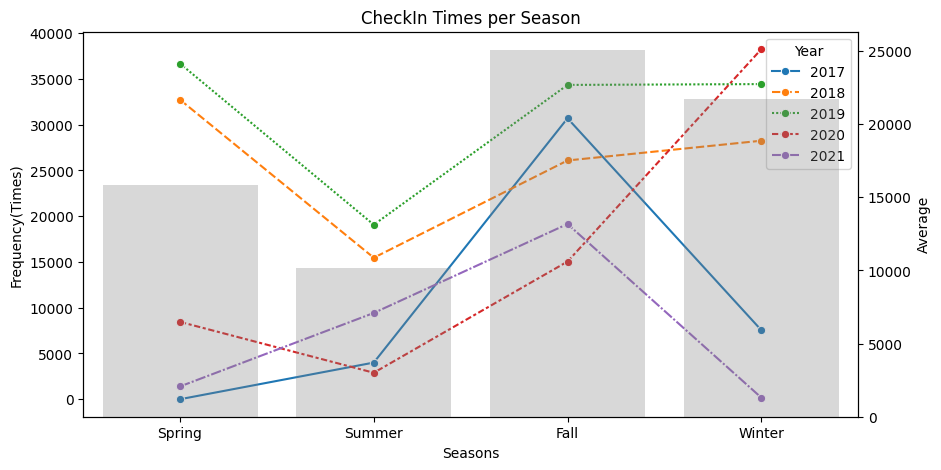

In [ ]:
#seperated yearly season checkin plot
fig, ax1 = plt.subplots(figsize=(10, 5))

#Lineplot
checkinSeason = sns.lineplot(data=seasonPivot.drop(columns=['All']), marker="o", ax=ax1)
checkinSeason.set_title("CheckIn Times per Season")
checkinSeason.set_xlabel("Seasons")
checkinSeason.set_ylabel("Frequency(Times)")
checkinSeason.legend(title="Year")

#Barchart for average checkin
ax2 = ax1.twinx()
sns.barplot(x=seasonPivot.index, y=seasonPivot['All'], alpha=0.3, color='gray', ax=ax2)

plt.show()

In [205]:
#Correlation Table

#Parse category into int
checkintimes_df['Lid Int'] = pd.factorize(df['Lid id'])[0]

corr = checkintimes_df.corr()
corr

#plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Check In Times", fontsize=20)    
plt.show()

ValueError: Length of values (21937) does not match length of index (380785)